In [1]:
import pandas as pd
import matplotlib.pyplot as plt

print("--- ANALISI SERIE STORICHE (Apple Stock) ---")

# --- 1. CARICAMENTO DATI ---
# Usiamo un dataset storico di Apple ospitato su GitHub
url = "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv"

--- ANALISI SERIE STORICHE (Apple Stock) ---


In [2]:
# Carichiamo i dati
df = pd.read_csv(url)

print("Prime 3 righe (Noterai che la data è un po' strana):")
print(df.head(3))

Prime 3 righe (Noterai che la data è un po' strana):
         Date   AAPL.Open   AAPL.High    AAPL.Low  AAPL.Close  AAPL.Volume  \
0  2015-02-17  127.489998  128.880005  126.919998  127.830002     63152400   
1  2015-02-18  127.629997  128.779999  127.449997  128.720001     44891700   
2  2015-02-19  128.479996  129.029999  128.330002  128.449997     37362400   

   AAPL.Adjusted          dn        mavg          up   direction  
0     122.905254  106.741052  117.927667  129.114281  Increasing  
1     123.760965  107.842423  118.940333  130.038244  Increasing  
2     123.501363  108.894245  119.889167  130.884089  Decreasing  


In [3]:
# --- 2. IL PROBLEMA DELLE DATE ---
# Pandas, di default, legge le date come semplice TESTO (object).
# Dobbiamo convertirle in "datetime".
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Ora impostiamo la data come INDICE (l'etichetta delle righe).
# Questo permette a Pandas di capire che stiamo lavorando su una linea temporale.
df.set_index('Date', inplace=True)

print("\n--- Ora la Data è l'indice: ---")
print(df.head(3))


--- Ora la Data è l'indice: ---
             AAPL.Open   AAPL.High    AAPL.Low  AAPL.Close  AAPL.Volume  \
Date                                                                      
2015-02-17  127.489998  128.880005  126.919998  127.830002     63152400   
2015-02-18  127.629997  128.779999  127.449997  128.720001     44891700   
2015-02-19  128.479996  129.029999  128.330002  128.449997     37362400   

            AAPL.Adjusted          dn        mavg          up   direction  
Date                                                                       
2015-02-17     122.905254  106.741052  117.927667  129.114281  Increasing  
2015-02-18     123.760965  107.842423  118.940333  130.038244  Increasing  
2015-02-19     123.501363  108.894245  119.889167  130.884089  Decreasing  


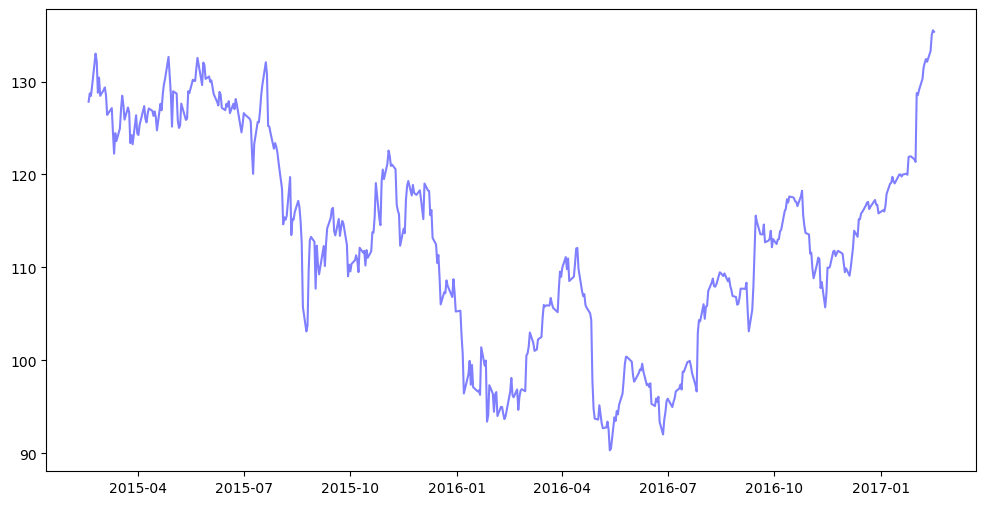

In [5]:
# --- 3. ANALISI DEL TREND ---
# Grafico veloce del prezzo di chiusura (AAPL.Close)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['AAPL.Close'], label='Prezzo Chiusura', color='blue', alpha=0.5)


Generazione grafico finanziario...


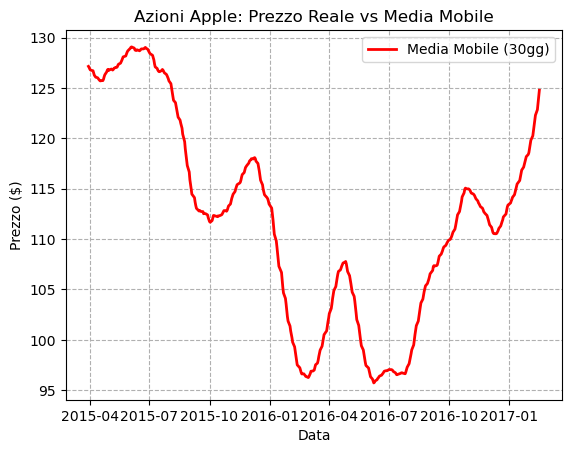

In [6]:
# --- 4. MEDIA MOBILE (Rolling Mean) ---
# I prezzi saltano su e giù ogni giorno (rumore).
# La media mobile a 30 giorni prende il giorno X e i 29 precedenti, e fa la media.
# "Liscia" la linea e ci mostra il trend vero.

df['Media_Mobile_30gg'] = df['AAPL.Close'].rolling(window=30).mean()

# Aggiungiamo la media mobile al grafico (Linea Rossa)
plt.plot(df.index, df['Media_Mobile_30gg'], label='Media Mobile (30gg)', color='red', linewidth=2)

plt.title('Azioni Apple: Prezzo Reale vs Media Mobile')
plt.xlabel('Data')
plt.ylabel('Prezzo ($)')
plt.legend()
plt.grid(True, linestyle='--')

print("\nGenerazione grafico finanziario...")
plt.show()

In [7]:
# --- 5. RESAMPLING (Cambiamento di frequenza) ---
# Abbiamo dati GIORNALIERI. E se volessimo vedere l'andamento ANNUALE?
# .resample('YE') raggruppa tutto per Fine Anno ('YE' = Year End) e calcola la media.

prezzo_annuale = df['AAPL.Close'].resample('YE').mean()

print("\n--- Prezzo Medio Annuale Apple ---")
print(prezzo_annuale)


--- Prezzo Medio Annuale Apple ---
Date
2015-12-31    120.817027
2016-12-31    104.604008
2017-12-31    124.229062
Freq: YE-DEC, Name: AAPL.Close, dtype: float64


--- STRATEGIA TRADING: GOLDEN CROSS ---
Indicatori calcolati! Ecco le ultime righe:
            AAPL.Close      SMA_15      SMA_50
Date                                          
2017-02-10  132.119995  126.237332  118.954600
2017-02-13  133.289993  127.117998  119.409999
2017-02-14  135.020004  128.121331  119.920600
2017-02-15  135.509995  129.029998  120.432799
2017-02-16  135.350006  129.923998  120.957600

Generazione grafico strategia...


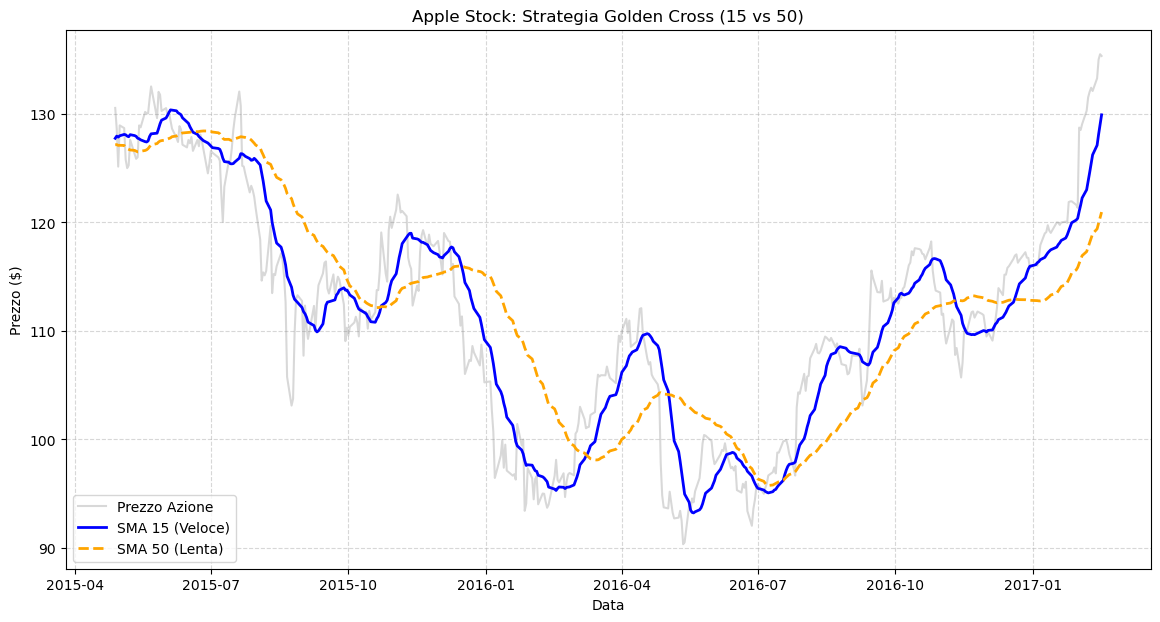

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

print("--- STRATEGIA TRADING: GOLDEN CROSS ---")

# --- 1. PREPARAZIONE DATI (Come prima) ---
url = "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv"
df = pd.read_csv(url)

# Convertiamo e indicizziamo la data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# --- 2. CREAZIONE INDICATORI (Le due medie) ---

# Media Mobile Veloce (15 giorni) - Linea Blu
df['SMA_15'] = df['AAPL.Close'].rolling(window=15).mean()

# Media Mobile Lenta (50 giorni) - Linea Arancione
df['SMA_50'] = df['AAPL.Close'].rolling(window=50).mean()

# Pulizia: Rimuoviamo i primi giorni dove le medie sono NaN (Not a Number)
df.dropna(inplace=True)

print("Indicatori calcolati! Ecco le ultime righe:")
print(df[['AAPL.Close', 'SMA_15', 'SMA_50']].tail())

# --- 3. VISUALIZZAZIONE STRATEGICA ---
plt.figure(figsize=(14, 7))

# A. Disegniamo il prezzo reale (in sottofondo, grigio chiaro)
plt.plot(df.index, df['AAPL.Close'], label='Prezzo Azione', color='gray', alpha=0.3)

# B. Disegniamo la Media Veloce (Blu)
plt.plot(df.index, df['SMA_15'], label='SMA 15 (Veloce)', color='blue', linewidth=2)

# C. Disegniamo la Media Lenta (Arancione)
plt.plot(df.index, df['SMA_50'], label='SMA 50 (Lenta)', color='orange', linewidth=2, linestyle='--')

plt.title('Apple Stock: Strategia Golden Cross (15 vs 50)')
plt.xlabel('Data')
plt.ylabel('Prezzo ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

print("\nGenerazione grafico strategia...")
plt.show()
